# Calculating MACD and EMA  

In [1]:
# Imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Load the apple data
df = pd.read_csv('pfe_us_2022-2024.csv')
df.head()

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
0,2022-01-02,56.9990,57.9192,55.2745,57.1922,1.482358e+08
1,2022-01-09,56.6604,56.7082,52.2433,53.9679,2.497626e+08
2,2022-01-16,53.9580,55.6240,52.7957,53.2213,1.553054e+08
3,2022-01-23,52.7860,53.1392,50.8136,51.1299,1.435882e+08
4,2022-01-30,50.1227,53.3530,48.2480,53.0212,2.145091e+08


In [3]:
# Function Calculating Exponential Moving Average
def exponential_moving_average(df, scope_N, column):
    alfa = 2 / (scope_N + 1)
    numerator, denominator = 0, 0
    for i_itr, i_row in df.iterrows():
        start_index = max(0, i_itr - scope_N + 1)
        if column == 'EMA_long' or column == 'EMA_short':
            numerator, denominator = i_row['Wolumen'], 1
        else:
            numerator, denominator = i_row['MACD'], 1

        for j_itr in range(start_index, i_itr + 1):
            if column == 'EMA_long' or column == 'EMA_short':
                numerator += ((1 - alfa) ** (i_itr - j_itr)) * df['Wolumen'].iloc[j_itr]
            else:
                numerator += ((1 - alfa) ** (i_itr - j_itr)) * df['MACD'].iloc[j_itr]
            denominator += (1 - alfa) ** (i_itr - j_itr)

        if column == 'EMA_long':
            df.at[i_itr, 'EMA_long'] = numerator / denominator
        elif column == 'EMA_short':
            df.at[i_itr, 'EMA_short'] = numerator / denominator
        else:
            df.at[i_itr, 'SIGNAL'] = numerator / denominator
            

In [4]:
N_long = 26
N_short = 12
N_signal = 9

# Calling the function for EMA = 12 and EMA = 26
exponential_moving_average(df, N_long, 'EMA_long')
exponential_moving_average(df, N_short, 'EMA_short')

In [5]:
# Displaying results of my calculations
df.describe(include='all')

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,EMA_long,EMA_short
count,116,116.000000,116.000000,116.000000,116.000000,1.160000e+02,1.160000e+02,1.160000e+02
unique,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2022-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,41.827028,42.835291,40.615041,41.687234,1.346372e+08,1.324871e+08,1.340460e+08
std,NaN,8.510264,8.778652,8.178999,8.574475,6.117256e+07,3.344637e+07,4.044796e+07
min,NaN,26.300000,27.320000,25.610000,26.590000,4.245516e+07,9.099381e+07,8.241406e+07
25%,NaN,35.757500,36.460000,34.838750,35.402500,9.574525e+07,1.042287e+08,1.035804e+08
50%,NaN,43.130350,44.262500,41.970700,42.852900,1.190750e+08,1.212100e+08,1.221514e+08
75%,NaN,49.259525,50.863325,47.782225,49.175350,1.533717e+08,1.493521e+08,1.555402e+08


In [6]:
# Short function to calculate MACD
def calculateMACD(df):
    for i_itr, i_row in df.iterrows():
        df.at[i_itr, 'MACD'] = i_row['EMA_short'] - i_row['EMA_long']

<Axes: xlabel='MACD', ylabel='Count'>

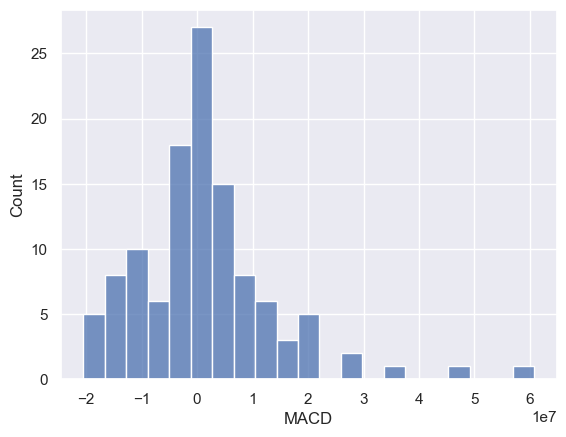

In [7]:
calculateMACD(df)

# Displaying results
sns.histplot(df['MACD'])

<Axes: xlabel='SIGNAL', ylabel='Count'>

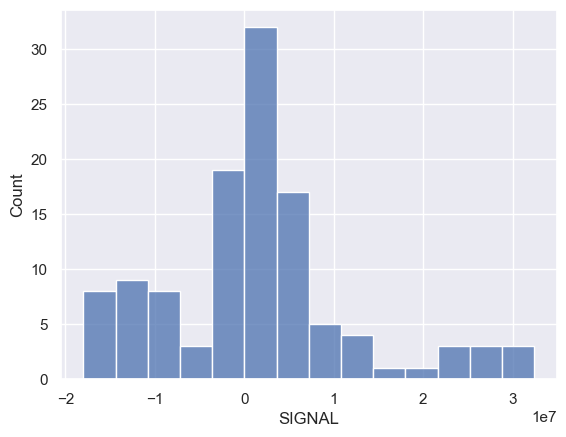

In [8]:
# Calculating Signals
exponential_moving_average(df, N_signal, 'SIGNAL')
sns.histplot(df['SIGNAL'])

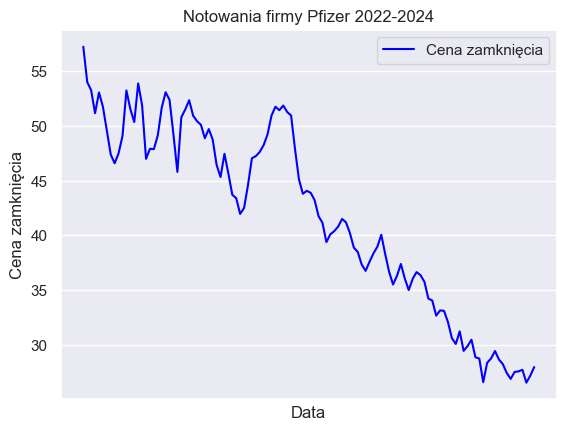

In [9]:
plt.plot(df['Data'], df['Zamkniecie'], label='Cena zamknięcia', color='blue')
plt.xticks([])
plt.title('Notowania firmy Pfizer 2022-2024')
plt.xlabel('Data')
plt.ylabel('Cena zamknięcia')
plt.legend()

C:\Users\jkrup\AppData\Local\Temp\ipykernel_3212\748712025.py:21: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


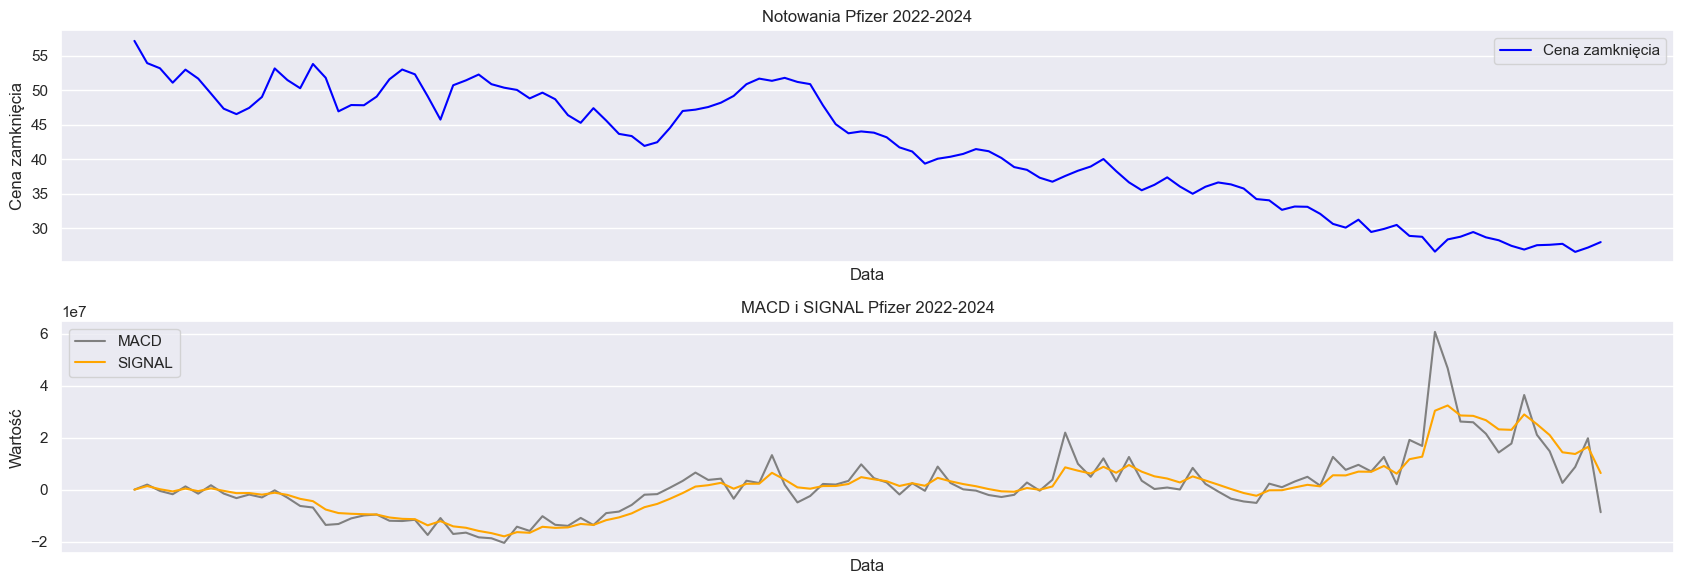

In [10]:
def plot_MACD_SIGNAL(df):
    plt.figure(figsize=(17, 6))
    
    plt.subplot(2, 1, 1)
    plt.plot(df['Data'], df['Zamkniecie'], label='Cena zamknięcia', color='blue')
    plt.xticks([])
    plt.title('Notowania Pfizer 2022-2024')
    plt.xlabel('Data')
    plt.ylabel('Cena zamknięcia')
    plt.legend()
    plt.tight_layout()
    
    plt.subplot(2, 1, 2)
    plt.plot(df['Data'], df['MACD'], label='MACD', color='grey')
    plt.plot(df['Data'], df['SIGNAL'], label='SIGNAL', color='orange')
    plt.title('MACD i SIGNAL Pfizer 2022-2024')
    plt.xticks([])
    plt.xlabel('Data')
    plt.ylabel('Wartość')
    plt.legend(loc = 'upper left')
    plt.tight_layout()

# Displaying MACD and Signals
plot_MACD_SIGNAL(df)

In [11]:
def buy_sell(signal):
  Buy = []
  Sell = []
  flag = -1

  for i in range(0, len(signal)):
    if signal['MACD'][i] > signal['SIGNAL'][i]:
      Sell.append(np.nan)
      if flag != 1:
        Buy.append(signal['SIGNAL'][i])
        flag = 1
      else:
        Buy.append(np.nan)
    elif signal['MACD'][i] < signal['SIGNAL'][i]:
      Buy.append(np.nan)
      if flag != 0:
        Sell.append(signal['SIGNAL'][i])
        flag = 0
      else:
        Sell.append(np.nan)
    else:
      Buy.append(np.nan)
      Sell.append(np.nan)
  return (Buy, Sell)

In [12]:
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0]
df['Sell_Signal_Price'] = a[1]

In [13]:
# Displaying data
df

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,EMA_long,EMA_short,MACD,SIGNAL,Buy_Signal_Price,Sell_Signal_Price
0,2022-01-02,56.9990,57.9192,55.2745,57.1922,1.482358e+08,1.482358e+08,1.482358e+08,0.000000e+00,0.000000e+00,NaN,NaN
1,2022-01-09,56.6604,56.7082,52.2433,53.9679,2.497626e+08,2.176339e+08,2.195790e+08,1.945091e+06,1.389350e+06,1.389350e+06,NaN
2,2022-01-16,53.9580,55.6240,52.7957,53.2213,1.553054e+08,1.768210e+08,1.763220e+08,-4.990913e+05,1.621773e+05,NaN,1.621773e+05
3,2022-01-23,52.7860,53.1392,50.8136,51.1299,1.435882e+08,1.666522e+08,1.648813e+08,-1.770928e+06,-6.822548e+05,NaN,NaN
4,2022-01-30,50.1227,53.3530,48.2480,53.0212,2.145091e+08,1.886903e+08,1.899365e+08,1.246147e+06,4.016918e+05,4.016918e+05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
111,2024-02-18,27.5400,28.0200,26.8600,27.6200,1.655683e+08,1.947406e+08,2.095425e+08,1.480195e+07,2.101300e+07,NaN,NaN
112,2024-02-25,27.6100,28.1400,27.1850,27.7600,1.267427e+08,1.871291e+08,1.897302e+08,2.601078e+06,1.438709e+07,NaN,NaN
113,2024-03-03,27.6700,27.6700,26.5100,26.5900,2.163293e+08,1.970940e+08,2.058345e+08,8.740514e+06,1.373904e+07,NaN,NaN
114,2024-03-10,26.3000,27.3200,25.6100,27.2200,3.376737e+08,2.188272e+08,2.386253e+08,1.979808e+07,1.645584e+07,1.645584e+07,NaN


In [14]:
def plot_buy_sell():
    plt.figure(figsize=(17, 6))
    plt.scatter(df.index, df['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha=1)
    plt.scatter(df.index, df['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha=1)
    
    plt.plot(df['Data'], df['MACD'], label='MACD', color='grey')
    plt.plot(df['Data'], df['SIGNAL'], label='SIGNAL', color='orange')
    plt.title('MACD i SIGNAL z punktami kupna/sprzedaży Pfizer 2022-2024')
    plt.xticks([])
    plt.xlabel('Data')
    plt.ylabel('Wartość')
    plt.legend(loc = 'upper left')
    plt.tight_layout()

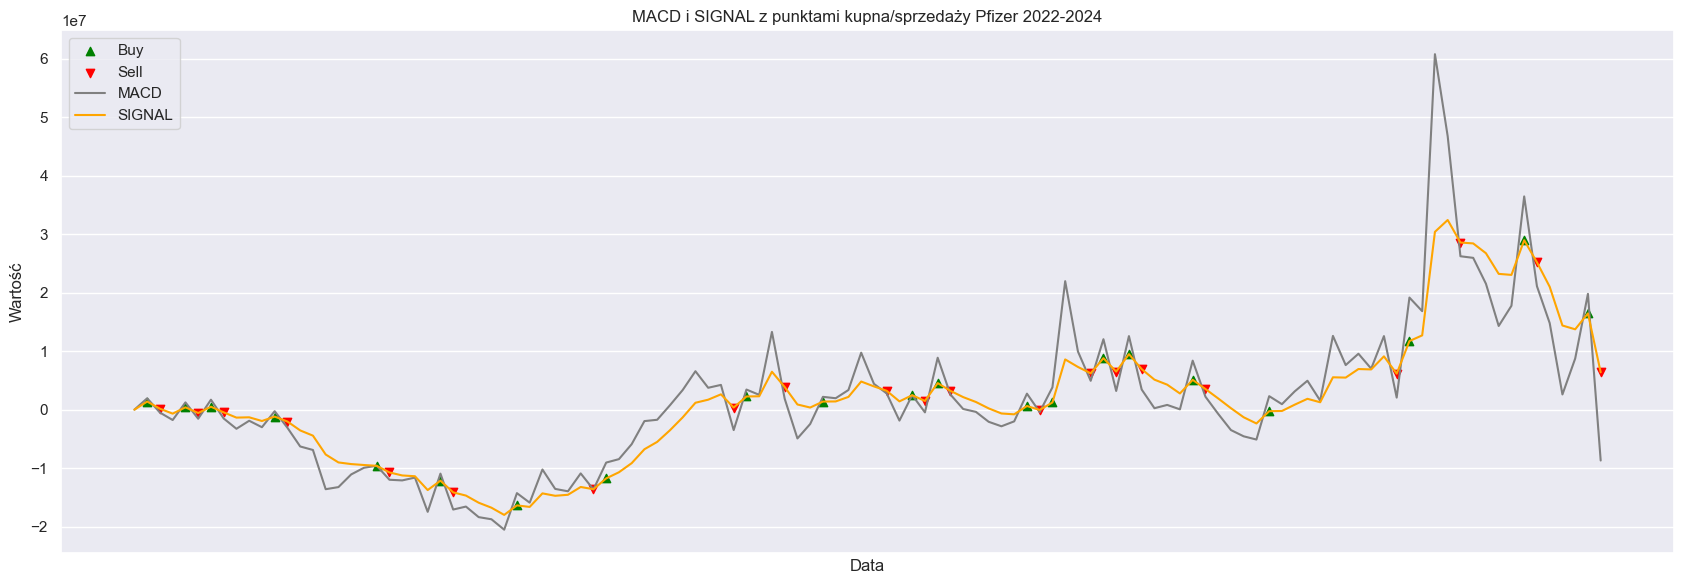

In [15]:
# Displaying MACD and Signals with Buy and Sell visualizations
plot_buy_sell()

# Implementing Trading Alghoritm

In [24]:
def MACD_trading_algorithm(df, initial_capital):
    bullish = 0  # Buy Signal
    bearish = 0  # Sell Signal
    position = 0  # Aktualna ilość akcji w portfelu

    buy_signal_prices = []
    sell_signal_prices = []
    
    df['buy_trading_alg'] = None
    df['sell_trading_alg'] = None

    for itr, row in df.iterrows():
        histogram = row['MACD'] - row['SIGNAL']

        if histogram > 0:
            bullish += 1
            bearish = 0
        if bullish > 0 and position == 0:
            buy_signal_prices.append(row['Zamkniecie'])
            df.at[itr, 'buy_trading_alg'] = row['Zamkniecie']
            position += initial_capital * 1.0 / row['Zamkniecie']
            bullish = 0
        else:
            bearish += 1
            bullish = 0

        if bearish > 1 and position > 0:
            sell_signal_prices.append(row['Zamkniecie'])
            df.at[itr, 'sell_trading_alg'] = row['Zamkniecie']
            initial_capital += position * row['Zamkniecie'] - initial_capital * 1.0
            position = 0
            bearish = 0

        if initial_capital <= 0:
            break

    return buy_signal_prices, sell_signal_prices, initial_capital


In [25]:
initial_capital = 1000
buy_signal_prices, sell_signal_prices, final_capital = MACD_trading_algorithm(df, initial_capital)

In [26]:
final_capital

769.9228984748062

In [27]:
buy_signal_prices

[53.9679,
 53.0212,
 53.1969,
 49.1146,
 45.7793,
 50.0808,
 45.6388,
 50.91,
 47.85,
 41.15,
 38.49,
 40.06,
 35.02,
 34.07,
 28.91,
 26.93,
 27.22]

In [28]:
sell_signal_prices

[51.1299,
 47.3609,
 50.3277,
 53.0403,
 51.4661,
 47.4335,
 49.21,
 51.83,
 43.21,
 40.39,
 38.97,
 35.53,
 36.66,
 30.5,
 28.79,
 27.62]

In [29]:
df

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,EMA_long,EMA_short,MACD,SIGNAL,Buy_Signal_Price,Sell_Signal_Price,buy_trading_alg,sell_trading_alg
0,2022-01-02,56.9990,57.9192,55.2745,57.1922,1.482358e+08,1.482358e+08,1.482358e+08,0.000000e+00,0.000000e+00,NaN,NaN,None,None
1,2022-01-09,56.6604,56.7082,52.2433,53.9679,2.497626e+08,2.176339e+08,2.195790e+08,1.945091e+06,1.389350e+06,1.389350e+06,NaN,53.9679,None
2,2022-01-16,53.9580,55.6240,52.7957,53.2213,1.553054e+08,1.768210e+08,1.763220e+08,-4.990913e+05,1.621773e+05,NaN,1.621773e+05,None,None
3,2022-01-23,52.7860,53.1392,50.8136,51.1299,1.435882e+08,1.666522e+08,1.648813e+08,-1.770928e+06,-6.822548e+05,NaN,NaN,None,51.1299
4,2022-01-30,50.1227,53.3530,48.2480,53.0212,2.145091e+08,1.886903e+08,1.899365e+08,1.246147e+06,4.016918e+05,4.016918e+05,NaN,53.0212,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2024-02-18,27.5400,28.0200,26.8600,27.6200,1.655683e+08,1.947406e+08,2.095425e+08,1.480195e+07,2.101300e+07,NaN,NaN,None,27.62
112,2024-02-25,27.6100,28.1400,27.1850,27.7600,1.267427e+08,1.871291e+08,1.897302e+08,2.601078e+06,1.438709e+07,NaN,NaN,None,None
113,2024-03-03,27.6700,27.6700,26.5100,26.5900,2.163293e+08,1.970940e+08,2.058345e+08,8.740514e+06,1.373904e+07,NaN,NaN,None,None
114,2024-03-10,26.3000,27.3200,25.6100,27.2200,3.376737e+08,2.188272e+08,2.386253e+08,1.979808e+07,1.645584e+07,1.645584e+07,NaN,27.22,None


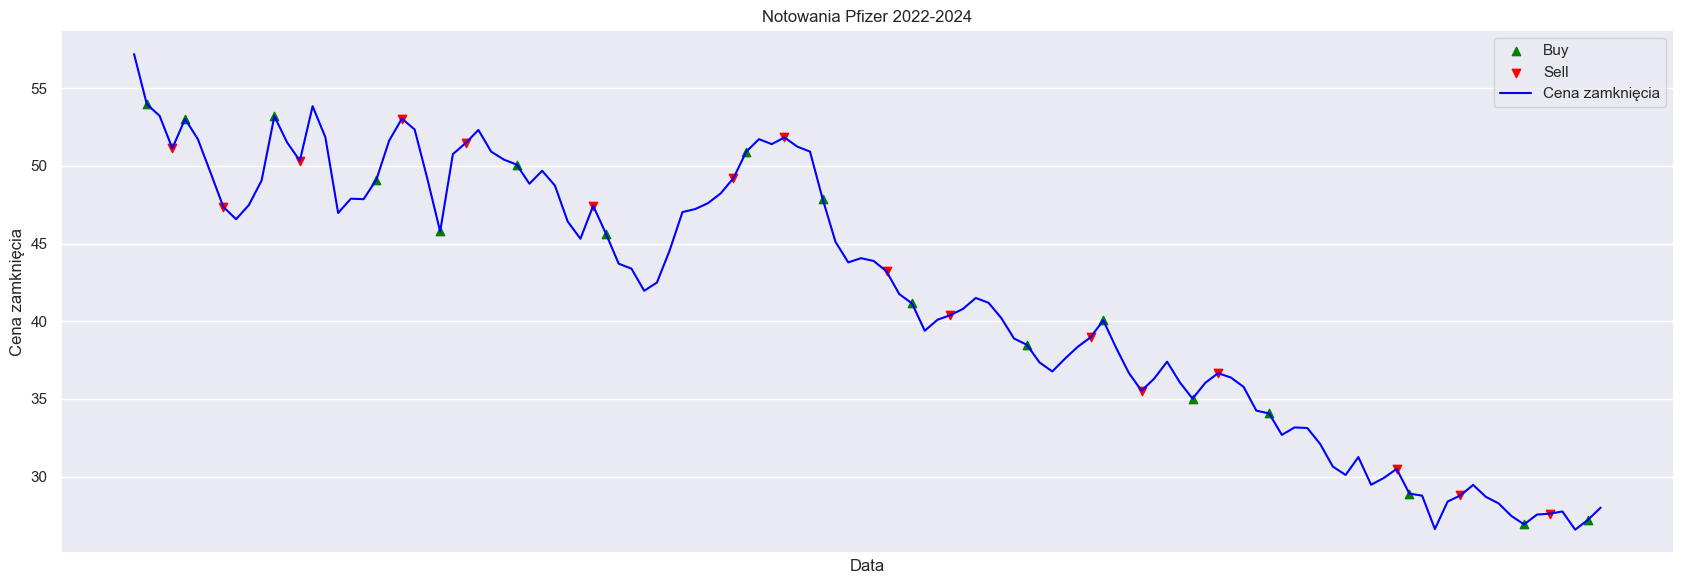

In [32]:
# Display the 'Sell' and 'Buy' moments of my trading alghoritm
plt.figure(figsize=(17, 6))
plt.scatter(df.index, df['buy_trading_alg'], color='green', label='Buy', marker='^', alpha=1)
plt.scatter(df.index, df['sell_trading_alg'], color='red', label='Sell', marker='v', alpha=1)
plt.plot(df['Data'], df['Zamkniecie'], label='Cena zamknięcia', color='blue')
plt.title('Notowania Pfizer 2022-2024')
plt.xticks([])
plt.xlabel('Data')
plt.ylabel('Cena zamknięcia')
plt.legend()
plt.tight_layout()

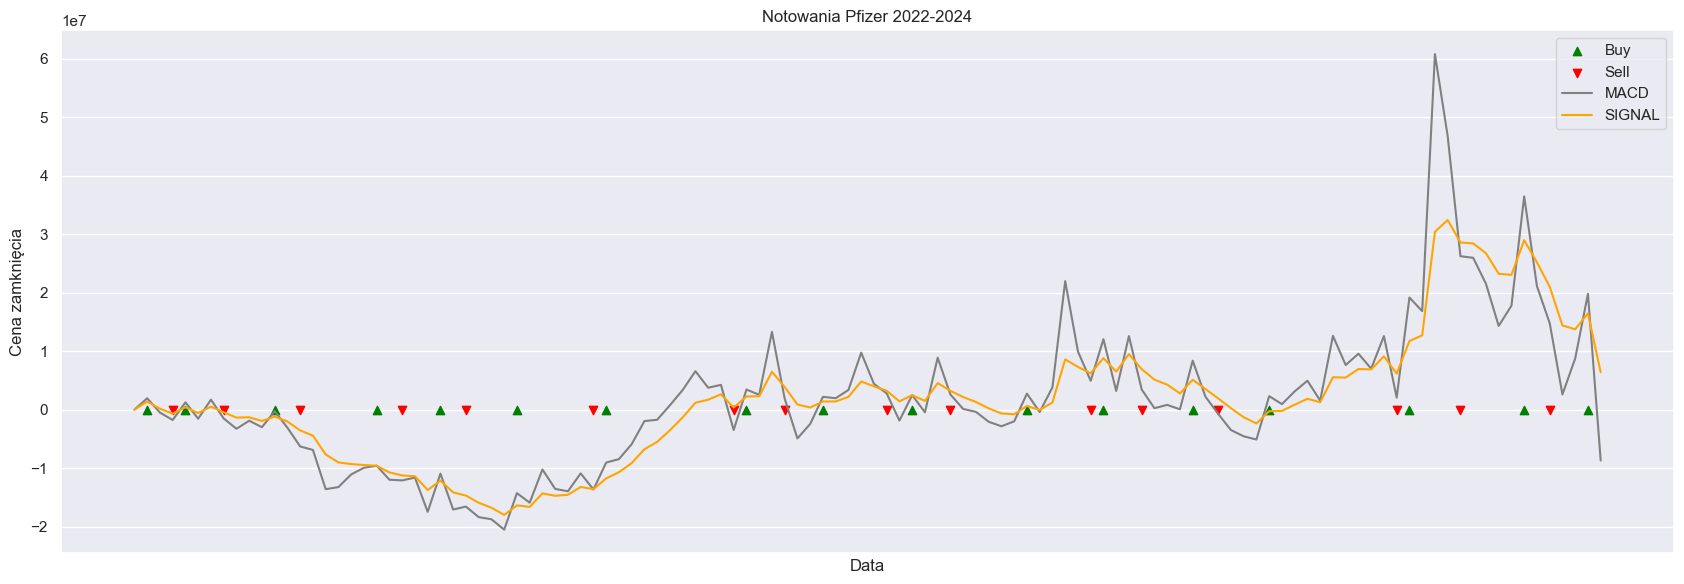

In [33]:
# Display the 'Sell' and 'Buy' moments of my trading alghoritm
plt.figure(figsize=(17, 6))
plt.scatter(df.index, df['buy_trading_alg'], color='green', label='Buy', marker='^', alpha=1)
plt.scatter(df.index, df['sell_trading_alg'], color='red', label='Sell', marker='v', alpha=1)
plt.plot(df['Data'], df['MACD'], label='MACD', color='grey')
plt.plot(df['Data'], df['SIGNAL'], label='SIGNAL', color='orange')
plt.title('Notowania Pfizer 2022-2024')
plt.xticks([])
plt.xlabel('Data')
plt.ylabel('Cena zamknięcia')
plt.legend()
plt.tight_layout()